In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline   # just to avoid plt.show() command

In [5]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])

In [6]:
# lets observe first 5 days 
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
type(f_birth)

pandas.core.frame.DataFrame

In [8]:
# values function helps us to take down series array to numpy array
series_value = f_birth.values

In [10]:
type(series_value)

numpy.ndarray

In [11]:
f_birth.shape


(365, 1)

In [13]:
# last 5 observations
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [14]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


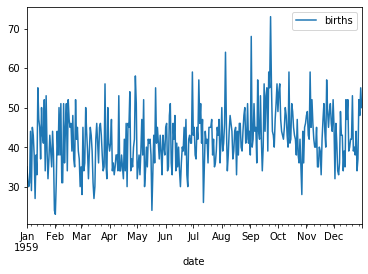

In [15]:
f_birth.plot()

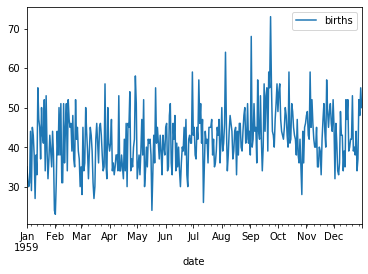

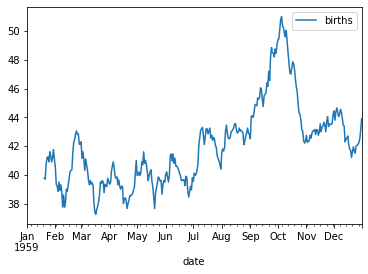

In [19]:
# now we have to smoothen the plot
# rolling function is used for moving average and in window is used for how much rolling is required
# moving avg is also used in stock marketing 
f_birth.plot()

f_birth_mean = f_birth.rolling(window=20).mean()
f_birth_mean.plot()




# Base Line 



In [22]:
value = pd.DataFrame(series_value) 
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [23]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [24]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
birth_test = birth_df[1:]
birth_error = mean_squared_error(birth_test.Actual_birth , birth_test.Forecast_birth)

In [33]:
# showing root mean squared error 
error_baseline = np.sqrt(birth_error)

9.177283229394606



# ARIMA - Auto Regressive Integrated Moving Average 

#### Auto regration = p 
#### Integrated ( whether stationary series ) = d 
#### Moving average = q

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

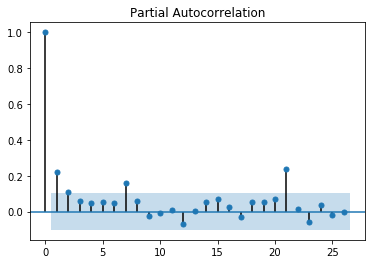

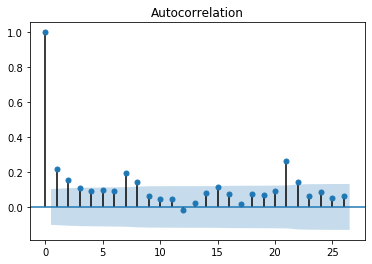

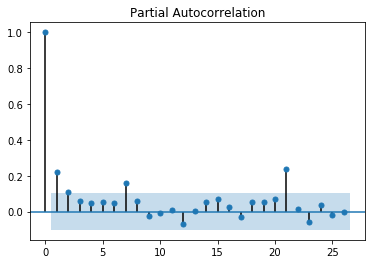

In [40]:
# plot_acf (auto correlation) is to identify parameter q 
# plot_pacf (partial auto correlation) is to identify parameter p
# ARIMA (p,q,r)
# x_labels are p and q 
plot_acf(f_birth)

plot_pacf(f_birth)

In [42]:
f_birth.size 

365

In [30]:
# spliting the data set to train and test 

birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

TypeError: 'DataFrame' object is not callable

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
birth_model = ARIMA(birth_train,order=(2,1,3))

birth_model_fit = birth_model.fit()

C:\Users\Pushpak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Pushpak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [58]:
# Akaike information criterion , lower the value better the prediction 
birth_model_fit.aic

2230.94824901245

In [59]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]
birth_forecast

array([45.30384103, 46.31074405, 43.64963085, 44.59236349, 46.49718319,
       44.34363874, 44.09002194, 46.34404451, 45.07550376, 43.88123853,
       45.95230735, 45.69592493, 43.97415625, 45.45691696, 46.10393962,
       44.31151816, 44.99252023, 46.26036906, 44.79363348, 44.6649282 ,
       46.1859242 , 45.30655668, 44.5334176 , 45.94690945, 45.74863534,
       44.60583748, 45.6336096 , 46.05006   , 44.84544317, 45.33715779,
       46.18242208, 45.1860684 , 45.13004688, 46.15790218, 45.55103601])

In [62]:
#birth_test

In [61]:
# root mean squared error of ARIMA model 
error_ARIMA = np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.860031644571154


# NORMALIZATION



#### 1. If your data is on different scales
#### 2. Because some algorithms work better when data is normalised 


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

%matplotlib inline   

In [68]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])

In [69]:
# normalization = (x-min)/(max-min)

In [32]:
birth_arr = f_birth.values
scaler = MinMaxScaler(feature_range=(0,1))

scaler = scaler.fit(birth_arr)

[35]


In [75]:
birth_normalize = scaler.transform(birth_arr)


array([0.24])

In [76]:
# spliting the data set to train and test 

birth_train = birth_normalize[0:330]
birth_test  = birth_normalize[330:365]

# training the moedel 
birth_model = ARIMA(birth_train,order=(2,1,3))
birth_model_fit = birth_model.fit()

In [77]:
birth_model_fit.aic

-343.1628892542186

In [87]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]
birth_forecast_reshape = birth_forecast.reshape(len(birth_forecast),1)
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)

birth_test_reshape = birth_test.reshape(len(birth_test),1)
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [88]:
# checking root mean squared error

error_normalization = np.sqrt(mean_squared_error(birth_test_reverse,birth_forecast_reverse))

6.859950383004437




# Standardization 

In [89]:
# Standardization 

from sklearn.preprocessing import StandardScaler

In [91]:
std_scalar = StandardScaler()
std_scalar = std_scalar.fit(birth_arr)

std_birth = std_scalar.transform(birth_arr)

In [93]:
# spliting the data set to train and test 

std_birth_train = std_birth[0:330]
std_birth_test  = std_birth[330:365]

# training the moedel 
std_birth_model = ARIMA(std_birth_train,order=(2,1,3))
std_birth_model_fit = std_birth_model.fit()

In [101]:
birth_model_fit.aic


array([[ 1.22907491],
       [ 0.54770744],
       [ 0.27516045],
       [ 1.3653484 ],
       [ 0.41143395],
       [-1.36012148],
       [ 0.54770744],
       [-0.13366003],
       [-1.08757449],
       [-1.22384798],
       [-0.8150275 ],
       [ 0.95652792],
       [ 0.13888696],
       [ 0.13888696],
       [-1.08757449],
       [-0.40620702],
       [-0.95130099],
       [ 1.3653484 ],
       [ 0.68398093],
       [ 1.3653484 ],
       [-0.40620702],
       [-0.26993352],
       [ 0.00261346],
       [ 0.00261346],
       [ 1.5016219 ],
       [-0.40620702],
       [-0.26993352],
       [-0.54248051],
       [ 0.27516045],
       [-1.08757449],
       [-0.67875401],
       [ 1.3653484 ],
       [ 0.82025443],
       [ 1.77416889],
       [ 1.09280142]])

In [103]:
std_birth_forecast = std_birth_model_fit.forecast(steps = 35)[0]
std_birth_forecast_reshape = std_birth_forecast.reshape(len(std_birth_forecast),1)
std_birth_forecast_reverse = std_scalar.inverse_transform(std_birth_forecast_reshape)

std_birth_forecast_reverse

array([[45.30367097],
       [46.31068917],
       [43.64937465],
       [44.59213074],
       [46.49711221],
       [44.34343248],
       [44.08975251],
       [46.34393423],
       [45.07533907],
       [43.88095927],
       [45.95214755],
       [45.69578398],
       [43.97388834],
       [45.45670992],
       [46.10380152],
       [44.31127339],
       [44.99227728],
       [46.26021553],
       [44.79341355],
       [44.66466494],
       [46.18574337],
       [45.30635514],
       [44.53314912],
       [45.94669731],
       [45.74844101],
       [44.60557479],
       [45.63336916],
       [46.04986085],
       [44.8451914 ],
       [45.33689671],
       [46.18220843],
       [45.18582682],
       [45.1297745 ],
       [46.15766861],
       [45.55079961]])

In [104]:
std_birth_test_reshape = std_birth_test.reshape(len(std_birth_test),1)
std_birth_test_reverse = std_scalar.inverse_transform(std_birth_test_reshape)
std_birth_test_reverse

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [105]:
# checking root mean squared error

error_standardization = np.sqrt(mean_squared_error(std_birth_test_reverse,std_birth_forecast_reverse))


6.859967850398251



# Hyperparameters Tuning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

In [2]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])

In [3]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,5)

In [4]:
# Finding best combination of (p,d,q)
c = [0]
arr = f_birth.values
for i in range(len(f_birth)):
    if c<arr[i]:
        c=arr[i]

combo = (0,0,0)

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = f_birth[0:330],f_birth[330:365]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    e = [error] 
                    if c>e:
                        c = e
                        combo = order
                    print("ARIMA %s , MSE = %.2f" %(order,error) )
                except: 
                    continue 

print("The optimal value of the ARIMA = %s and MSE = ")

ARIMA (0, 0, 1) , MSE = 42.63
ARIMA (0, 0, 2) , MSE = 42.63
ARIMA (0, 0, 3) , MSE = 42.68
ARIMA (0, 0, 4) , MSE = 43.40
ARIMA (0, 1, 1) , MSE = 45.77
ARIMA (0, 1, 2) , MSE = 49.25
ARIMA (0, 1, 3) , MSE = 51.52
ARIMA (0, 1, 4) , MSE = 51.80
ARIMA (0, 2, 1) , MSE = 78.32
ARIMA (0, 2, 2) , MSE = 45.01
ARIMA (0, 2, 3) , MSE = 47.08
ARIMA (0, 2, 4) , MSE = 47.71
ARIMA (1, 0, 0) , MSE = 42.73
ARIMA (1, 0, 1) , MSE = 43.49
ARIMA (1, 1, 0) , MSE = 59.76
ARIMA (1, 1, 1) , MSE = 50.31
ARIMA (1, 1, 2) , MSE = 45.38
ARIMA (1, 1, 3) , MSE = 48.13
ARIMA (1, 1, 4) , MSE = 50.08
ARIMA (1, 2, 0) , MSE = 65.08
ARIMA (2, 0, 0) , MSE = 42.90
ARIMA (2, 0, 1) , MSE = 44.41
ARIMA (2, 0, 2) , MSE = 43.21
ARIMA (2, 1, 0) , MSE = 65.58
ARIMA (2, 1, 1) , MSE = 52.08
ARIMA (2, 1, 2) , MSE = 53.17
ARIMA (2, 1, 3) , MSE = 47.67
ARIMA (2, 1, 4) , MSE = 48.36
ARIMA (2, 2, 0) , MSE = 42.69
ARIMA (3, 0, 0) , MSE = 43.55
ARIMA (3, 0, 1) , MSE = 44.55
ARIMA (3, 0, 2) , MSE = 44.64
ARIMA (3, 0, 3) , MSE = 44.28
ARIMA (3, 

[73]


[4]
4
